In [10]:
import numpy as np
import matplotlib.pyplot as plt
import Lib.subdivision as sub
import Lib.embedded as emb

# Case 3 in SPE-182614-MS

## Subdivision Method

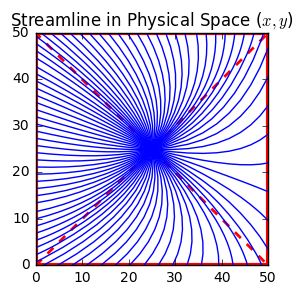

In [11]:
Method_subdivision=sub.WellGrid(Rect0=(0,0),Rect1=(50,50),Qw=1000,Qe=(200,400,300,100),h=26.25,phi=0.2)
Method_subdivision.Subdivision(debug=0)
SL,TOF,SL_end,TOF_end=Method_subdivision.SLTrace(NSL=80)

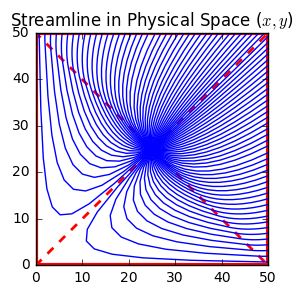

In [5]:
Method_subdivision=sub.WellGrid(Rect0=(0,0),Rect1=(50,50),Qw=1000,Qe=(0,0,500,500),h=26.25,phi=0.2)
Method_subdivision.Subdivision(debug=0)
SL,TOF,SL_end,TOF_end=Method_subdivision.SLTrace(NSL=80)

## Embedded Method

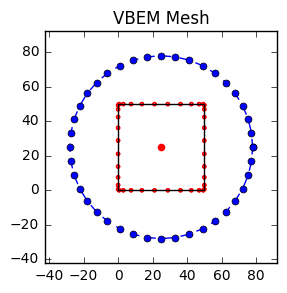

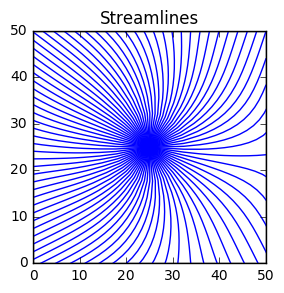

In [12]:
Boundary_vert=[(0, 0), (0, 50), (50, 50), (50, 0)]
Well_vert=[(25,25)]
Qwell=[1000]
Qedge=[400,300,100,200]
Method_embedded=emb.WellGrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qe=Qedge,Qw=Qwell,Nbd=10,rw=0.25,h=26.25,phi=0.2,miu=1,kxy=(200,200))
Method_embedded.Meshing()
Method_embedded.FlowSol()
SL,TOF,SL_end,TOF_end=Method_embedded.SLtrace(NSL=80,deltaT=0.1,method='Adaptive')

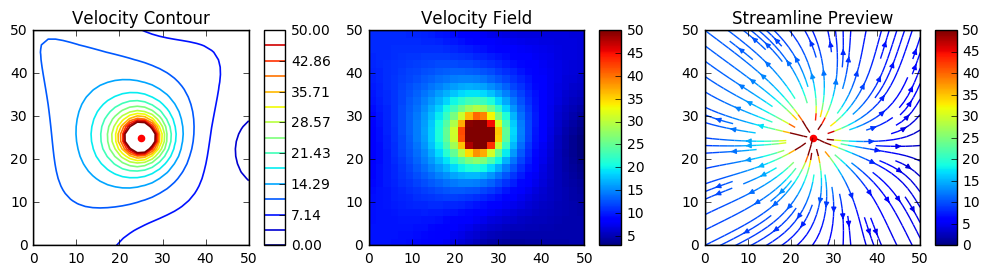

In [7]:
P,V_x,V_y=Method_embedded.FieldPlot(vmax=50)

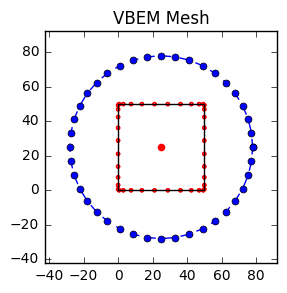

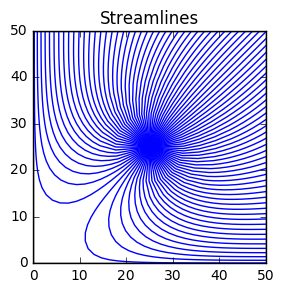

In [8]:
Boundary_vert=[(0, 0), (0, 50), (50, 50), (50, 0)]
Well_vert=[(25,25)]
Qwell=[1000]
Qedge=[0,500,500,0]
Method_embedded=emb.WellGrid(Pts_e=Boundary_vert,Pts_w=Well_vert,Qe=Qedge,Qw=Qwell,Nbd=10,rw=0.25,h=26.25,phi=0.2,miu=1,kxy=(200,200))
Method_embedded.Meshing()
Method_embedded.FlowSol()
SL,TOF,SL_end,TOF_end=Method_embedded.SLtrace(NSL=81,deltaT=0.1,method='Adaptive')

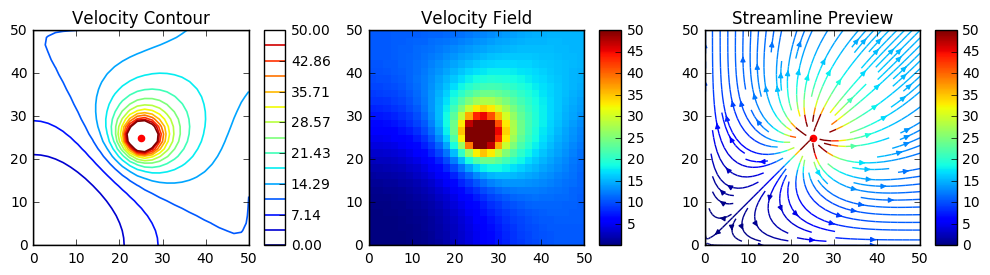

In [9]:
P,V_x,V_y=Method_embedded.FieldPlot(vmax=50)